In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import r2_score,mean_squared_error

import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
import random


In [27]:
df = pd.read_csv('./all-dataset-and-calculate-BMI-and-remove-height-weight.csv')

df['cholesterol'] = df['cholesterol'].replace({
    1: round(random.uniform(1.0, 5.17),2),
    2: round(random.uniform(5.17, 6.18),2),
    3: round(random.uniform(6.21, 7.21),2)
})

df['gluc'] = df['gluc'].replace({
    1: round(random.uniform(3.5,5.7),2),
    2: round(random.uniform(5.7,6.9),2),
    3: round(random.uniform(7.0,10.4)),
})

df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['pulse_pressure_index'] = df['pulse_pressure'] / df['ap_hi']
df = df.drop('pulse_pressure',axis=1)
df
df_copy = df.copy()

In [13]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure_index
0,50,2,110,80,1.37,4.65,0,0,1,0,22.0,0.272727
1,55,1,140,90,6.82,4.65,0,0,1,1,35.0,0.357143
2,51,1,130,70,6.82,4.65,0,0,0,1,24.0,0.461538
3,48,2,150,100,1.37,4.65,0,0,1,1,29.0,0.333333
4,47,1,100,60,1.37,4.65,0,0,0,0,23.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
68970,52,2,120,80,1.37,4.65,1,0,1,0,27.0,0.333333
68971,61,1,140,90,5.27,6.61,0,0,1,1,50.0,0.357143
68972,52,2,180,90,6.82,4.65,0,1,0,1,31.0,0.500000
68973,61,1,135,80,1.37,6.61,0,0,0,1,27.0,0.407407


In [3]:
def view_plot(data):
    plt.figure(figsize=(8,8))
    sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
    plt.show

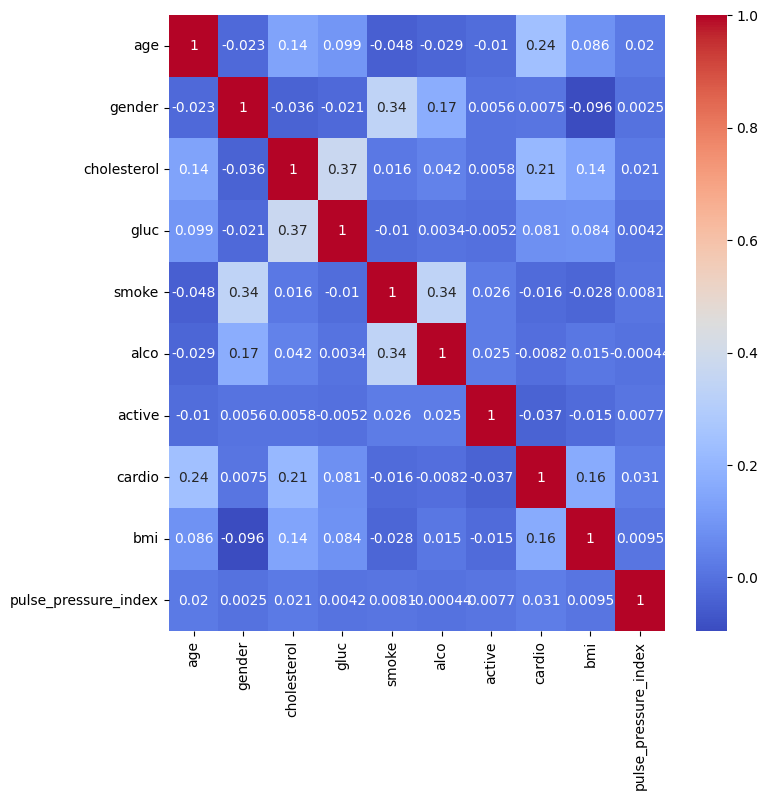

In [20]:
view_plot(df)

In [28]:
X = df.drop('cardio',axis=1)
y = df['cardio']

In [6]:
X,y

(       age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
 0       50       2    110     80         3.19  3.84      0     0       1   
 1       55       1    140     90         6.58  3.84      0     0       1   
 2       51       1    130     70         6.58  3.84      0     0       0   
 3       48       2    150    100         3.19  3.84      0     0       1   
 4       47       1    100     60         3.19  3.84      0     0       0   
 ...    ...     ...    ...    ...          ...   ...    ...   ...     ...   
 68970   52       2    120     80         3.19  3.84      1     0       1   
 68971   61       1    140     90         5.72  6.41      0     0       1   
 68972   52       2    180     90         6.58  3.84      0     1       0   
 68973   61       1    135     80         3.19  6.41      0     0       0   
 68974   56       1    120     80         5.72  3.84      0     0       1   
 
         bmi  pulse_pressure_index  
 0      22.0              0.272727  


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((62077, 11), (6898, 11), (62077,), (6898,))

Робимо нормалізацію для датасету та навчаємо модель та обираємо кращу датасет та нормалізацію

In [30]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='liblinear', random_state=42),
    # "Decision Tree": DecisionTreeClassifier(),
    # "Random Forest": RandomForestClassifier(),
    # "SVM": SVC(),
    # "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    # "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    # "AdaBoost": AdaBoostClassifier(),
    # "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}

In [32]:

for name, model in models.items():
    print(f'Навчаємо модель {name}')

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_all = np.concatenate([y_pred_train, y_pred_test])

    # print(f"Shape of y_pred_all: {y_pred_all.shape}")
    # print(f"Shape of df_copy: {df_copy.shape}")

    if len(y_pred_all) == len(df_copy):
        df[f"{name}_prediction"] = y_pred_all
    else:
        print(f"Warning: Length mismatch between y_pred_all and df_copy for model {name}")

    print(f'Accuracy on test set: {np.round(accuracy_score(y_test, y_pred_test), 2)}')
    print(f'MSE {round(mean_squared_error(y_test,y_pred_test),2)}')
    print(f'RMSE {round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)}')

print('\nUpdate dataset with added features')

df.to_excel('updated_dataset.xlsx', index=False)

df

Навчаємо модель Logistic Regression
Accuracy on test set: 0.73
MSE 0.27
RMSE 0.52
Навчаємо модель Gradient Boosting
Accuracy on test set: 0.74
MSE 0.26
RMSE 0.51
Навчаємо модель MLP Neural Network
Accuracy on test set: 0.74
MSE 0.26
RMSE 0.51

Update dataset with added features


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure_index,Logistic Regression_prediction,Gradient Boosting_prediction,MLP Neural Network_prediction
0,50,2,110,80,4.41,4.57,0,0,1,0,22.0,0.272727,0,1,1
1,55,1,140,90,6.34,4.57,0,0,1,1,35.0,0.357143,0,0,0
2,51,1,130,70,6.34,4.57,0,0,0,1,24.0,0.461538,1,1,1
3,48,2,150,100,4.41,4.57,0,0,1,1,29.0,0.333333,1,1,1
4,47,1,100,60,4.41,4.57,0,0,0,0,23.0,0.400000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68970,52,2,120,80,4.41,4.57,1,0,1,0,27.0,0.333333,0,0,0
68971,61,1,140,90,5.17,6.10,0,0,1,1,50.0,0.357143,0,0,1
68972,52,2,180,90,6.34,4.57,0,1,0,1,31.0,0.500000,0,0,0
68973,61,1,135,80,4.41,6.10,0,0,0,1,27.0,0.407407,1,1,1


функція активації, кільксть прихованих шарів MLP, KNN- k, крос валідація для даних, оптимізаця гіпер параметрів, для звичайний потім ансамбиль, крос для ансамбиль

In [ ]:

for name, model in models.items():
    print(f'Навчаємо модель {name}')

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_all = np.concatenate([y_pred_train, y_pred_test])

    # print(f"Shape of y_pred_all: {y_pred_all.shape}")
    # print(f"Shape of df_copy: {df_copy.shape}")

    if len(y_pred_all) == len(df_copy):
        df[f"{name}_prediction"] = y_pred_all
    else:
        print(f"Warning: Length mismatch between y_pred_all and df_copy for model {name}")

    print(f'Accuracy on test set: {np.round(accuracy_score(y_test, y_pred_test), 2)}')
    print(f'MSE {round(mean_squared_error(y_test,y_pred_test),2)}')
    print(f'RMSE {round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)}')

print('\nUpdate dataset with added features')

df.to_excel('updated_dataset.xlsx', index=False)

df

In [33]:
df_train_ensemble = df.copy()

Спробуємо створити власний ансабиль використовуючи фітчі, якими є передбчення моделей

In [34]:
X_ensemble = df_train_ensemble.drop('cardio',axis=1)
y_ensemble = df_train_ensemble['cardio']

X_train_ensemble,X_test_ensemble,y_train_ensemble,y_test_ensemble = train_test_split(X_ensemble,y_ensemble,train_size=0.1)


In [37]:

for name, model in models.items():
    print(f'Навчаємо модель {name}')

    model.fit(X_train_ensemble,y_train_ensemble)

    y_pred_train = model.predict(X_train_ensemble)
    y_pred_test = model.predict(X_test_ensemble)

    y_pred_all = np.concatenate([y_pred_train, y_pred_test])

    # print(f"Shape of y_pred_all: {y_pred_all.shape}")
    # print(f"Shape of df_copy: {df_copy.shape}")

    if len(y_pred_all) == len(df_copy):
        df_train_ensemble[f"{name}_prediction"] = y_pred_all
    else:
        print(f"Warning: Length mismatch between y_pred_all and df_copy for model {name}")

    print(f'Accuracy on test set: {np.round(accuracy_score(y_test_ensemble, y_pred_test), 2)}')
    print(f'MSE {round(mean_squared_error(y_test_ensemble,y_pred_test),2)}')
    print(f'RMSE {round(np.sqrt(mean_squared_error(y_test_ensemble,y_pred_test)),2)}')

print('\nUpdate dataset with added features')

df_train_ensemble.to_excel('updated_dataset_ensemble.xlsx', index=False)


Навчаємо модель Logistic Regression
Accuracy on test set: 0.72
MSE 0.28
RMSE 0.53
Навчаємо модель Random Forest
Accuracy on test set: 0.7
MSE 0.3
RMSE 0.55
Навчаємо модель KNN
Accuracy on test set: 0.69
MSE 0.31
RMSE 0.55
Навчаємо модель MLP Neural Network
Accuracy on test set: 0.67
MSE 0.33
RMSE 0.58

Update dataset with added features


In [ ]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('mlp',MLPClassifier()),
    ('grad',GradientBoostingClassifier())
]

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train,y_train)

y_pred_test = stack_model.predict(X_test)

print(f'Accuracy for stacking model: {np.round(accuracy_score(y_test,y_pred_test),2)}')
print(f'MSE: {np.round(mean_squared_error(y_test,y_pred_test),2)}')
print(f'RMSE: {np.round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2)}')

Accuracy for stacking model: 0.74
MSE: 0.26


TypeError: return arrays must be of ArrayType

Спробуємо додати Bayesian Optimization, та подивитися чи зміниться точність моделі

In [39]:
from bayes_opt import BayesianOptimization

def rf_evaluate(n_estimators, max_depth, min_samples_split):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

param_bounds = {
    'n_estimators': (30, 100),
    'max_depth': (5, 30),       
    'min_samples_split': (2, 10) 
}

optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5,n_iter=25)

print(f'Best hyperparameters: {optimizer.max}')

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.738     | 14.36     | 9.606     | 81.24     |
| 2         | 0.7231    | 19.97     | 3.248     | 40.92     |
| 3         | 0.7331    | 6.452     | 8.929     | 72.08     |
| 4         | 0.716     | 22.7      | 2.165     | 97.89     |
| 5         | 0.7124    | 25.81     | 3.699     | 42.73     |
| 6         | 0.7331    | 15.32     | 6.897     | 74.94     |
| 7         | 0.7311    | 5.821     | 9.999     | 83.35     |
| 8         | 0.7282    | 24.54     | 9.98      | 80.4      |
| 9         | 0.7388    | 11.1      | 2.024     | 82.46     |
| 10        | 0.7311    | 5.492     | 2.595     | 58.77     |
| 11        | 0.7327    | 5.037     | 3.093     | 35.89     |
| 12        | 0.7322    | 5.597     | 9.602     | 46.29     |
| 13        | 0.7298    | 5.869     | 2.085     | 76.7      |
| 14        | 0.7269    | 17.28     | 2.609     | 82.96     |
| 15    

Спробуємо використати підхід до навчання моделей який має назву Blanding

In [43]:
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42,max_iter=1000)
model_knn = KNeighborsClassifier()

model_rf.fit(X_train,y_train)
model_lr.fit(X_train,y_train)
model_knn.fit(X_train,y_train)

pred_rf = model_rf.predict_proba(X_test)[:, 1]
pred_lr = model_lr.predict_proba(X_test)[:, 1]
pred_knn = model_knn.predict_proba(X_test)[:, 1]

predictions_base = pd.DataFrame({
    'rf': pred_rf,
    'lr': pred_lr,
    'knn': pred_knn
})

meta_model = GradientBoostingClassifier()
meta_model.fit(predictions_base, y_test)
y_pred_blend = meta_model.predict(predictions_base)
accuracy = accuracy_score(y_test, y_pred_blend)
print(f'Точність блендінгової моделі: {accuracy:.2f}')

Точність блендінгової моделі: 0.74


Визначення які ознаки є важливими

In [9]:
import time

def features_importances(X_train_f,y_train_f):
    rf = RandomForestClassifier()
    rf.fit(X_train_f, y_train_f)

    feature_names = X.columns

    start_time = time.time()
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

Elapsed time to compute the importances: 0.094 seconds


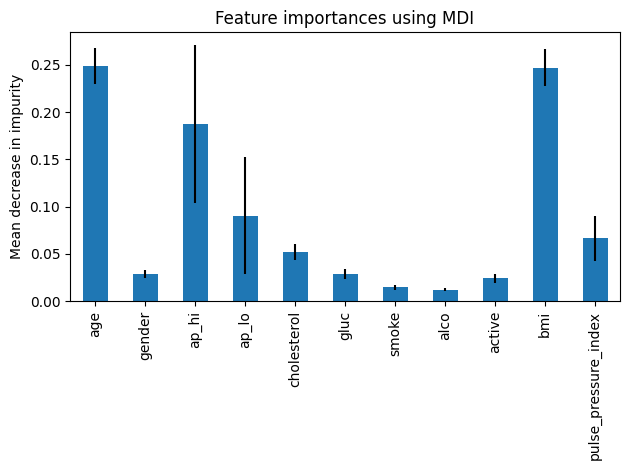

In [47]:
features_importances(X_train,y_train)

In [ ]:
model = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],  # Кількість дере
    'max_depth': [None, 10, 20, 30],  # Глибина
    'min_samples_split': [2, 5, 10],  # Мінімальна кількість зразків для поділу
    'min_samples_leaf': [1, 2, 4]     # Мінімальна кількість зразків у листку
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='accuracy')

grid_search.fit(X_train,y_train)

print(f'Best features: {grid_search.best_params_}')
print(f'Best features accuracy on validate: {grid_search.best_score_}')

Best features: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best features accuracy on validate: 0.7334501454851892


In [11]:
df_copy = df_copy.drop_duplicates()
print(f"Всього було видалено: {df_copy.duplicated().sum()} ")

Всього було видалено: 0 


функція активації, кільксть прихованих шарів MLP, KNN- k, крос валідація для даних, оптимізаця гіпер параметрів, для звичайний потім ансамбиль, крос для ансамбиль

In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=2000,random_state=42)
}

In [22]:
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Decision Tree": {'max_depth': [None, 5, 10, 20], 'criterion': ['gini', 'entropy']},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "Naive Bayes": {},
    "MLP Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
        'activation': ['relu', 'tanh'], 
        'solver': ['adam', 'sgd'], 
        'alpha': [0.0001, 0.001, 0.01]
    }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат: {grid_search.best_score_:.2f}")

print("\nРезультати для всіх моделей:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Найкращі параметри: {result['Best Params']}")
    print(f"  Найкращий результат: {result['Best Score']:.2f}\n")


Налаштування моделі: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Середній результат: 0.72

Налаштування моделі: Decision Tree
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Середній результат: 0.73

Налаштування моделі: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Найкращі параметри для Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Середній результат: 0.73

Налаштування моделі: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Найкращі параметри для KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Середній результат: 0.71

Налаштування моделі: Gradient Boosting
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Найкращі параметри для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_es

d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Найкращі параметри для AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Середній результат: 0.73

Налаштування моделі: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для Naive Bayes: {}
Середній результат: 0.71

Налаштування моделі: MLP Neural Network
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Найкращі параметри для MLP Neural Network: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Середній результат: 0.73

Результати для всіх моделей:
Logistic Regression:
  Найкращі параметри: {'C': 1, 'solver': 'liblinear'}
  Найкращий результат: 0.72

Decision Tree:
  Найкращі параметри: {'criterion': 'gini', 'max_depth': 5}
  Найкращий результат: 0.73

Random Forest:
  Найкращі параметри: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
  Найкращий результат: 0.73

KNN:
  Найкращі параметри: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
  Найкращий результат: 0.71

Gradient B

In [38]:
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Decision Tree": {'max_depth': [None, 5, 10, 20], 'criterion': ['gini', 'entropy']},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    "KNN": {'n_neighbors': [5, 8, 10, 12], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.001]},
    "Naive Bayes": {},
    "MLP Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
        'activation': ['relu', 'tanh'], 
        'solver': ['adam', 'sgd'], 
        'alpha': [0.0001, 0.001, 0.01]
    }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_ensemble, y_ensemble)
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат: {grid_search.best_score_:.2f}")

print("\nРезультати для всіх моделей:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Найкращі параметри: {result['Best Params']}")
    print(f"  Найкращий результат: {result['Best Score']:.2f}\n")


Налаштування моделі: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Середній результат: 0.73

Налаштування моделі: Decision Tree
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Середній результат: 0.73

Налаштування моделі: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Найкращі параметри для Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Середній результат: 0.73

Налаштування моделі: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Найкращі параметри для KNN: {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
Середній результат: 0.72

Налаштування моделі: Gradient Boosting
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Найкращі параметри для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n

d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Найкращі параметри для AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Середній результат: 0.73

Налаштування моделі: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для Naive Bayes: {}
Середній результат: 0.71

Налаштування моделі: MLP Neural Network
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Найкращі параметри для MLP Neural Network: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Середній результат: 0.73

Результати для всіх моделей:
Logistic Regression:
  Найкращі параметри: {'C': 0.1, 'solver': 'liblinear'}
  Найкращий результат: 0.73

Decision Tree:
  Найкращі параметри: {'criterion': 'gini', 'max_depth': 5}
  Найкращий результат: 0.73

Random Forest:
  Найкращі параметри: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
  Найкращий результат: 0.73

KNN:
  Найкращі параметри: {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
  Найкращий результат: 0.72

Gradient B

In [16]:
from sklearn.model_selection import KFold


for name,model in models.items():
    print(f'Навчаємо модель {name} з використанням K-Fold')
    accuracy_scores = []
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    for train_index,test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)

        y_pred_test = model.predict(X_test)
        
        accuracy_scores.append(accuracy_score(y_test,y_pred_test))

    print(f"Точність для кожного фолду: {accuracy_scores}")
    print(f"Середня точність: {np.mean(accuracy_scores):.2f}\n")

    accuracy_scores.clear()


Навчаємо модель Logistic Regression з використанням K-Fold
Точність для кожного фолду: [0.7225991649269311, 0.7190327070285316, 0.7294711203897007, 0.7172929714683368, 0.7247738343771747, 0.7305785123966942]
Середня точність: 0.72

Навчаємо модель Random Forest з використанням K-Fold
Точність для кожного фолду: [0.6934585942936674, 0.6948503827418232, 0.706767571329158, 0.6898921363952679, 0.6984168406402227, 0.6989125706829056]
Середня точність: 0.70

Навчаємо модель KNN з використанням K-Fold
Точність для кожного фолду: [0.6916318719554627, 0.6959812108559499, 0.6987647877522617, 0.6875434933890049, 0.691196938065414, 0.7004784688995215]
Середня точність: 0.69

Навчаємо модель MLP Neural Network з використанням K-Fold
Точність для кожного фолду: [0.7305149617258176, 0.7233820459290188, 0.7254697286012526, 0.7086812804453723, 0.7286012526096033, 0.7307525010874293]
Середня точність: 0.72

